In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd 

In [82]:
dataset = pd.read_csv('./dataset/marvel_box_office.csv')
dataset

,Movie,Release Date,Release Month,Release Day,Release Year,Ownership,Domestic Box Office,Inflation Adjusted Domestic,International Box Office,Inflation Adjusted International,...,Inflation Adjusted Opening Weekend,Budget,Inflation Adjusted Budget,IMDb Score,Meta Score,Tomatometer,Rotten Tomato Audience Score,Run Time In Minutes,Phase,Director
0,Iron Man,5/2/2008,May,2,2008,Marvel Studios,318604126,467231126,266567421,3.909196e+08,...,149756442,186000000,272767935,7.9,79,94,91,126,One,Jon Favreau
1,The Incredible Hulk,6/13/2008,June,13,2008,Marvel Studios,134806913,197704288,130766946,1.917794e+08,...,81268794,137500000,201653899,6.6,61,67,69,112,One,Louis Leterrier
2,Iron Man 2,5/7/2010,May,7,2010,Marvel Studios,312433331,416973763,308723058,4.120220e+08,...,170992360,170000000,226882130,6.9,57,72,71,124,One,Jon Favreau
3,Thor,5/6/2011,May,6,2011,Marvel Studios,181030624,240384926,268295994,3.562619e+08,...,87271973,150000000,199180327,7.0,57,77,76,115,One,Kenneth Brangh
4,Captain America: The First Avenger,7/22/2011,July,22,2011,Marvel Studios,176654505,234574020,193915271,2.574941e+08,...,86389190,140000000,185901643,6.9,66,80,75,124,One,Joe Johnston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Punisher: Warzone,12/5/2008,December,5,2008,Lionsgate Films,8050977,11807352,2106557,3.089421e+06,...,6264398,35000000,51330083,5.9,30,29,42,103,NaN,Lexi Alexander
62,Blade,8/21/1998,August,21,1998,New Line Cinema,70141876,157482710,61095812,1.371725e+08,...,38334263,45000000,101034109,7.1,47,58,78,120,NaN,Stephen Norrington
63,Blade II,3/22/2002,March,22,2002,New Line Cinema,81676888,148030572,72661713,1.316915e+08,...,58953529,54000000,97869190,6.7,52,57,68,117,NaN,Guillermo del Toro
64,Blade: Trinity,12/8/2004,December,8,2004,New Line Cinema,52397389,88619322,78955776,1.335373e+08,...,27164311,65000000,109934026,5.8,38,24,58,113,NaN,David S. Goyer


In [83]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [85]:
import numpy as np
import pandas as pd

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid activation function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define the mean squared error (MSE) loss function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Initialize weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

# Forward pass
def forward(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    output = z2
    return z1, a1, z2, output

# Backward pass
def backward(X, y, z1, a1, z2, output, W1, W2):
    m = X.shape[0]
    dloss = 2 * (output - y) / m
    dZ2 = dloss
    dW2 = np.dot(a1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    return dW1, db1, dW2, db2

# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Train the neural network
def train_neural_network(X, y, input_size, hidden_size, output_size, num_epochs, learning_rate):
    # Initialize parameters
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    
    # Training loop
    for epoch in range(num_epochs):
        # Forward pass
        z1, a1, z2, output = forward(X, W1, b1, W2, b2)
        
        # Compute and print loss
        loss = mean_squared_error(y, output)
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')
        
        # Backward pass
        dW1, db1, dW2, db2 = backward(X, y, z1, a1, z2, output, W1, W2)
        
        # Update parameters
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, output

# Example usage
if __name__ == '__main__':
    # Load dataset
    dataset = pd.read_csv('./dataset/marvel_box_office.csv')
    
    # Preprocess data and extract features and target variable
    X = dataset[['Domestic Box Office', 'Budget']].values
    y = dataset['International Box Office'].values.reshape(-1, 1)
    
    # Normalize features
    X = (X - X.mean()) / X.std()
    
    # Define hyperparameters
    input_size = X.shape[1]
    hidden_size = 5
    output_size = 1
    num_epochs = 1000
    learning_rate = 0.01
    
    # Train the neural network
    W1, b1, W2, b2, predictions = train_neural_network(X, y, input_size, hidden_size, output_size, num_epochs, learning_rate)
    
    # Print movie names, original box office values, and predicted box office values
    movie_names = dataset['Movie']
    for i, movie_name in enumerate(movie_names):
        print(f'Movie: {movie_name}, Original Box Office: {y[i][0]}, Predicted Box Office: {predictions[i][0]}')


Epoch 0, Loss: 2.638123437568379e+17
Epoch 100, Loss: 9.581166228976904e+16
Epoch 200, Loss: 9.179389808592274e+16
Epoch 300, Loss: 8.94143325907986e+16
Epoch 400, Loss: 8.80050084825705e+16
Epoch 500, Loss: 8.717032061787307e+16
Epoch 600, Loss: 8.667596745424973e+16
Epoch 700, Loss: 8.63831812994241e+16
Epoch 800, Loss: 8.620977544554166e+16
Epoch 900, Loss: 8.610707390154754e+16
Movie: Iron Man, Original Box Office: 266567421, Predicted Box Office: 461047308.07903874
Movie: The Incredible Hulk, Original Box Office: 130766946, Predicted Box Office: 461047308.07903874
Movie: Iron Man 2, Original Box Office: 308723058, Predicted Box Office: 461047308.07903874
Movie: Thor, Original Box Office: 268295994, Predicted Box Office: 461047308.07903874
Movie: Captain America: The First Avenger, Original Box Office: 193915271, Predicted Box Office: 461047308.07903874
Movie: The Avengers, Original Box Office: 891742301, Predicted Box Office: 461047308.07903874
Movie: Iron Man 3, Original Box Offi

C:\Users\tanma\AppData\Local\Temp\ipykernel_2088\1271780463.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


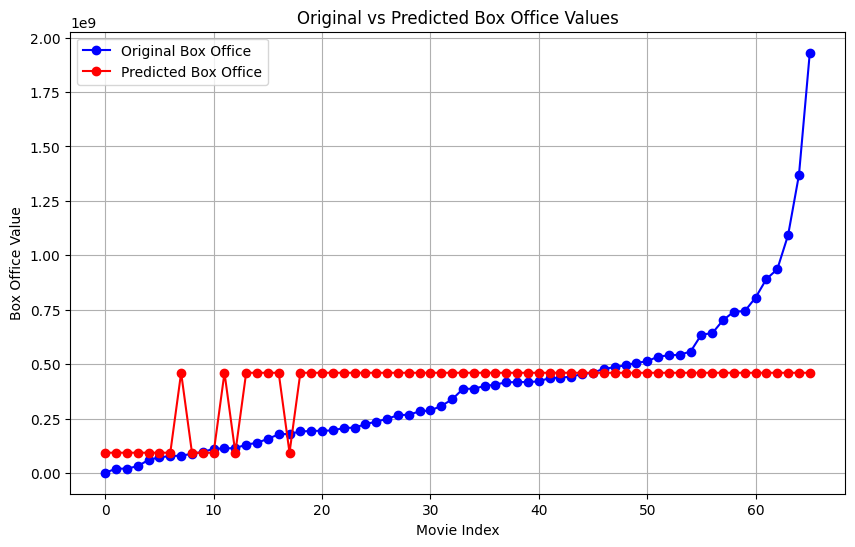

In [87]:
import matplotlib.pyplot as plt

sorted_indices = np.argsort(y.flatten())  
y_sorted = y[sorted_indices]
predictions_sorted = predictions[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(y_sorted, label='Original Box Office', marker='o', color='blue')
plt.plot(predictions_sorted, label='Predicted Box Office', marker='o', color='red')
plt.xlabel('Movie Index')
plt.ylabel('Box Office Value')
plt.title('Original vs Predicted Box Office Values')
plt.legend()
plt.grid(True)
plt.show()
